<a href="https://colab.research.google.com/github/AkothCarole/fifa_results/blob/master/Week_6_IP_May_2020_Caroline_Akoth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task
Overview 

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)

Approach 1: Polynomial approach

What to train given:

Rank of home team

Rank of away team

Tournament type

Model 1: Predict how many goals the home team scores.

Model 2: Predict how many goals the away team scores.

Approach 2: Logistic approach

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

Dataset link: https://drive.google.com/file/d/1BYUqaEEnFtAe5lvzJh9lpVpR2MAvERUc/view


#Load data

In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Load and Read data
data=pd.read_csv('fifa_ranking.csv')
data.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [9]:
data.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


#Explore data

In [4]:
#Explore entries and data type
data.shape

(57793, 16)

In [5]:
data.describe

<bound method NDFrame.describe of        rank country_full  ... confederation   rank_date
0         1      Germany  ...          UEFA  1993-08-08
1         2        Italy  ...          UEFA  1993-08-08
2         3  Switzerland  ...          UEFA  1993-08-08
3         4       Sweden  ...          UEFA  1993-08-08
4         5    Argentina  ...      CONMEBOL  1993-08-08
...     ...          ...  ...           ...         ...
57788   206     Anguilla  ...      CONCACAF  2018-06-07
57789   206      Bahamas  ...      CONCACAF  2018-06-07
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[57793 rows x 16 columns]>

In [6]:
data.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

In [8]:
data.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

#Read fifa results data

In [11]:
#Read Results
results = pd.read_csv('results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [12]:
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [13]:
#Explore Results data
results.shape

(40839, 9)

In [14]:
results.describe

<bound method NDFrame.describe of              date         home_team  ...   country  neutral
0      1872-11-30          Scotland  ...  Scotland    False
1      1873-03-08           England  ...   England    False
2      1874-03-07          Scotland  ...  Scotland    False
3      1875-03-06           England  ...   England    False
4      1876-03-04          Scotland  ...  Scotland    False
...           ...               ...  ...       ...      ...
40834  2019-07-18    American Samoa  ...     Samoa     True
40835  2019-07-18              Fiji  ...     Samoa     True
40836  2019-07-19           Senegal  ...     Egypt     True
40837  2019-07-19        Tajikistan  ...     India     True
40838  2019-07-20  Papua New Guinea  ...     Samoa     True

[40839 rows x 9 columns]>

In [15]:
results.columns


Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [17]:
data.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date'],
      dtype='object')

In [16]:
results.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

#Merge Datasets

In [54]:
#Merge Datasets(Review again)
fifaresults = pd.concat([data,results], axis=1,sort= True)
fifaresults.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [28]:
fifaresults.shape

(212831, 25)

In [29]:
fifaresults.columns

Index(['rank', 'country_full', 'country_abrv', 'total_points',
       'previous_points', 'rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted', 'confederation', 'rank_date', 'date',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral'],
      dtype='object')

In [30]:
fifaresults.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
date                        object
home_team                   object
away_team                   object
home_score                   int64
away_score                   int64
tournament                  object
city                        object
country                     object
neutral                       bool
dtype: object

#Explore Merged dataset

In [31]:
#Check anomalies 
print (fifaresults.nunique())

rank                        209
country_full                216
country_abrv                216
total_points               5143
previous_points            1427
rank_change                  95
cur_year_avg               3970
cur_year_avg_weighted      3970
last_year_avg              3990
last_year_avg_weighted     3858
two_year_ago_avg           3888
two_year_ago_weighted      3597
three_year_ago_avg         3900
three_year_ago_weighted    3410
confederation                 6
rank_date                   172
date                        172
home_team                   198
away_team                   202
home_score                   15
away_score                   11
tournament                   40
city                        449
country                     172
neutral                       2
dtype: int64


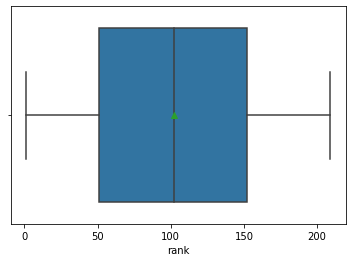

In [32]:
#Check and remove outliers
sns.boxplot(fifaresults['rank'],showmeans=True)

In [34]:
fifaresults.dtypes

rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
date                        object
home_team                   object
away_team                   object
home_score                   int64
away_score                   int64
tournament                  object
city                        object
country                     object
neutral                       bool
dtype: object

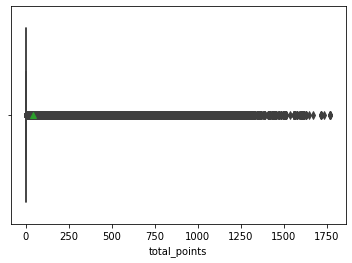

In [35]:
sns.boxplot(fifaresults['total_points'],showmeans=True)

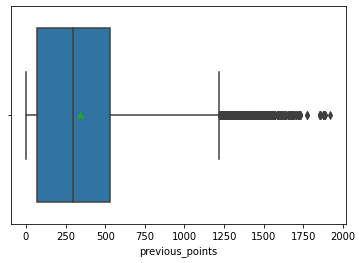

In [37]:
sns.boxplot(fifaresults['previous_points'],showmeans=True)


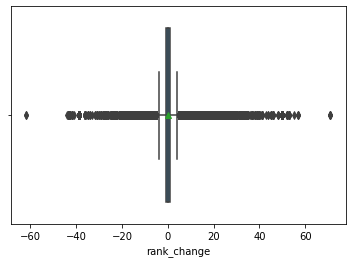

In [38]:
sns.boxplot(fifaresults['rank_change'],showmeans=True)

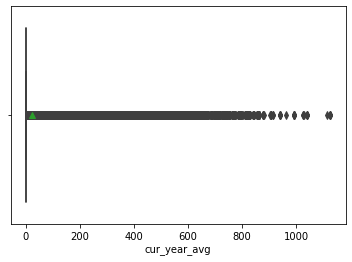

In [40]:
sns.boxplot(fifaresults['cur_year_avg'],showmeans=True)

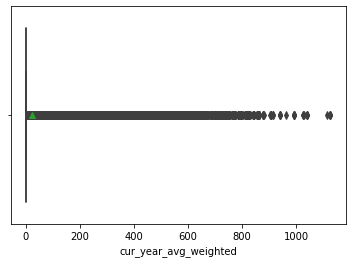

In [41]:
sns.boxplot(fifaresults['cur_year_avg_weighted'],showmeans=True)

In [0]:
#Dropping Outliers


In [43]:
fifaresults.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-08-08,Bolivia,Uruguay,3,1,FIFA World Cup qualification,La Paz,Bolivia,False
1,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-08-08,Brazil,Mexico,1,1,Friendly,Maceió,Brazil,False
2,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-08-08,Ecuador,Venezuela,5,0,FIFA World Cup qualification,Quito,Ecuador,False
3,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-08-08,Guinea,Sierra Leone,1,0,Friendly,Conakry,Guinea,False
4,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,1993-08-08,Paraguay,Argentina,1,3,FIFA World Cup qualification,Asunción,Paraguay,False


In [56]:
#Drop irrelevent data
fifaresults.drop(['rank_date','country_full','date','last_year_avg'],1, inplace=True)
fifaresults.head()

KeyError: ignored

In [58]:
#Find missing data
fifaresults.isnull().sum()

rank                           0
country_abrv                   0
total_points                   0
previous_points                0
rank_change                    0
cur_year_avg                   0
cur_year_avg_weighted          0
last_year_avg_weighted         0
two_year_ago_avg               0
two_year_ago_weighted          0
three_year_ago_avg             0
three_year_ago_weighted        0
confederation                  0
home_team                  16954
away_team                  16954
home_score                 16954
away_score                 16954
tournament                 16954
city                       16954
country                    16954
neutral                    16954
dtype: int64

In [59]:
fifaresults.dropna().head()

,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,2,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,England,Scotland,4.0,2.0,Friendly,London,England,False
2,3,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,4,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,England,Scotland,2.0,2.0,Friendly,London,England,False
4,5,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


In [61]:
#change categorical to numerical
def tournament(GAMES):
    if (GAMES == 'FIFA World Cup qualification') or (GAMES == 'FIFA World Cup'):
        return 'World_Cup'
    if GAMES == 'Friendly':
        return 'Friendly'
    else:
        return 'Other Matches'
fifaresults['GAMES'] = fifaresults['tournament'].apply(lambda w: tournament(w))
fifaresults['GAMES'].unique()

array(['Friendly', 'Other Matches', 'World_Cup'], dtype=object)

In [68]:
#Find correlation of variables
correlation = fifaresults[['home_team','away_team','home_score','away_score','tournament']].corr()
correlation

,home_score,away_score
home_score,1.000000,-0.133412
away_score,-0.133412,1.000000


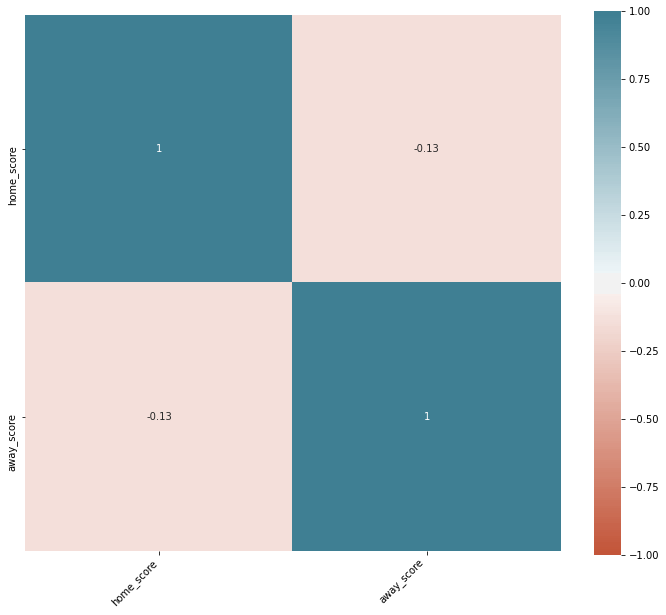

In [65]:

plt.figure(figsize = (12,10))
correlation = fifaresults.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True 
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

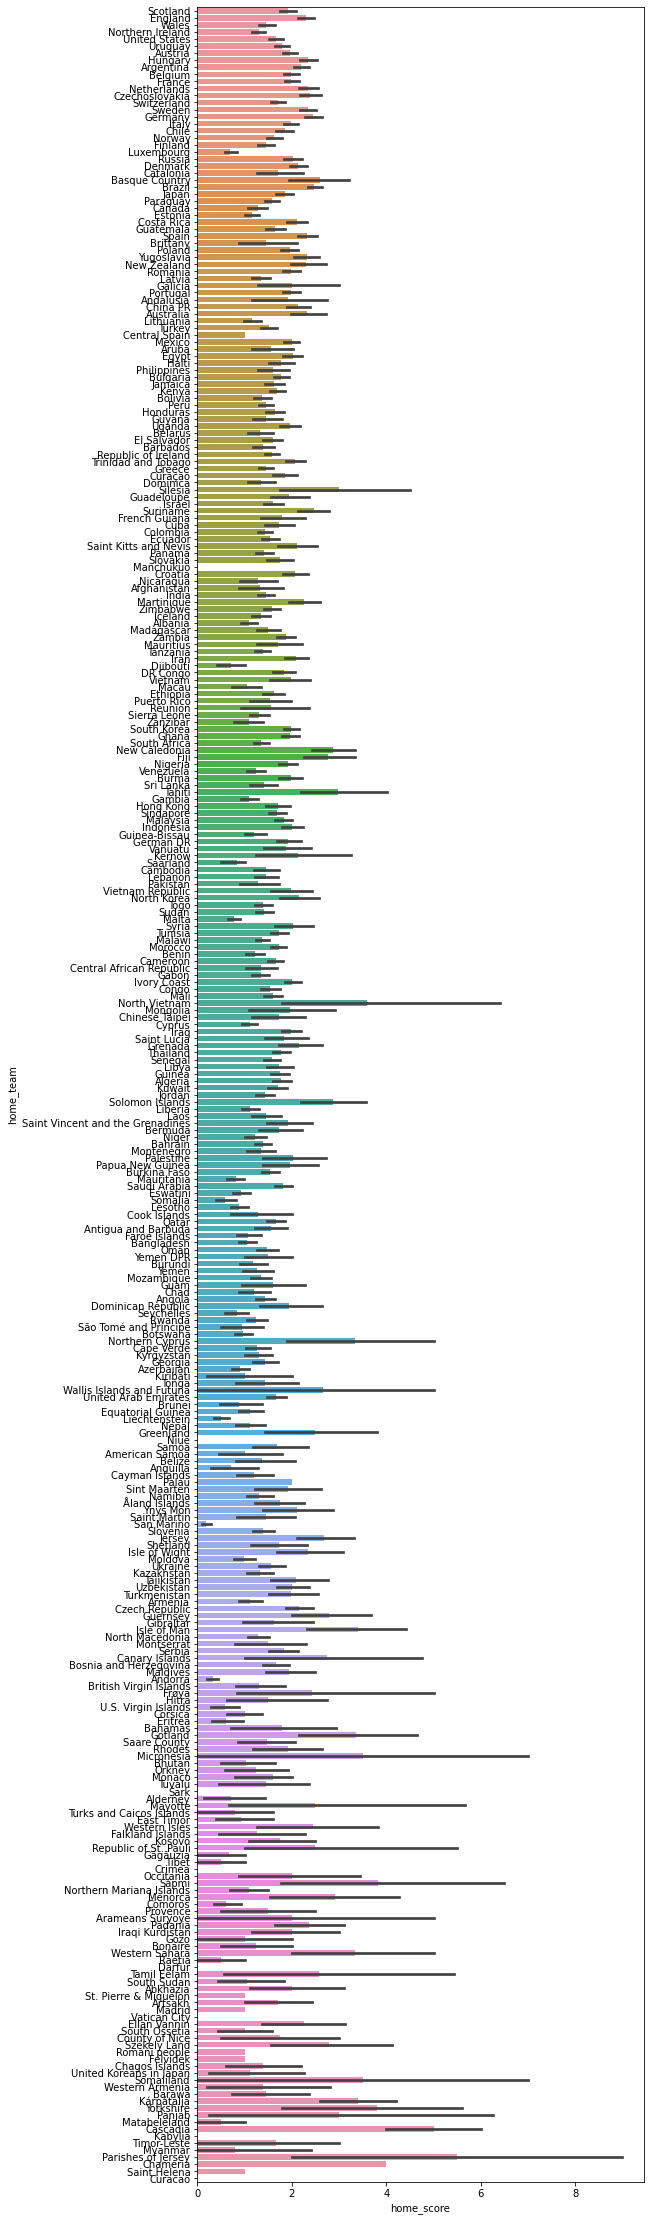

In [69]:
#Univariate Plots
fig, ax = plt.subplots(figsize=(8,40))
sns.barplot(x=fifaresults['home_score'], y= fifaresults['home_team'], ax=ax)

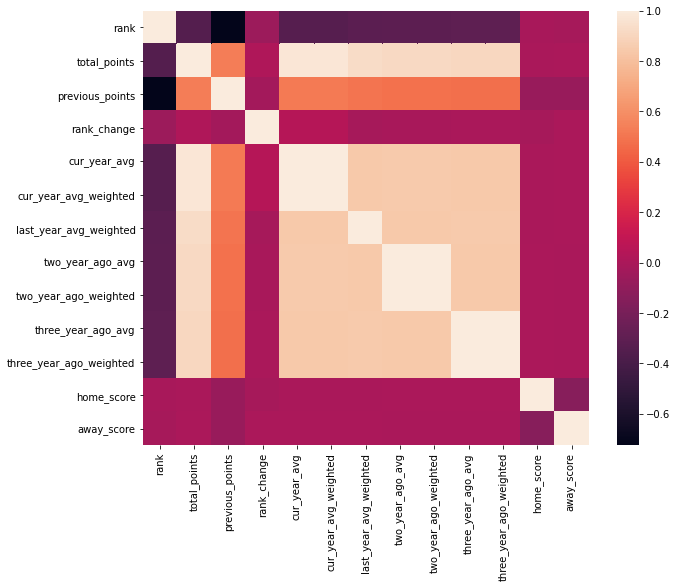

In [71]:
# Correlation Matrix
f, ax = plt.subplots(figsize=(10,8))
corr = fifaresults.corr()
sns.heatmap(corr,\
           xticklabels=corr.columns.values,\
           yticklabels=corr.columns.values)

#Polynomial Regression

In [0]:
#Import stats libraries

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression


In [73]:
fifaresults.head()

,rank,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,home_team,away_team,home_score,away_score,tournament,city,country,neutral,GAMES
0,1,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Friendly
1,2,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,England,Scotland,4.0,2.0,Friendly,London,England,False,Friendly
2,3,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Friendly
3,4,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,England,Scotland,2.0,2.0,Friendly,London,England,False,Friendly
4,5,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Friendly


In [74]:
fifaresults.columns

Index(['rank', 'country_abrv', 'total_points', 'previous_points',
       'rank_change', 'cur_year_avg', 'cur_year_avg_weighted',
       'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',
       'three_year_ago_avg', 'three_year_ago_weighted', 'confederation',
       'home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'city', 'country', 'neutral', 'GAMES'],
      dtype='object')

In [89]:
homescores= fifaresults[['rank', 'home_score', 'away_score']]
results= fifaresults.iloc[:, 14:]
homescores= pd.concat([homescores, results], axis=1)
homescores.head()

,rank,home_score,away_score,away_team,home_score,away_score,tournament,city,country,neutral,GAMES
0,1,0.0,0.0,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Friendly
1,2,4.0,2.0,Scotland,4.0,2.0,Friendly,London,England,False,Friendly
2,3,2.0,1.0,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Friendly
3,4,2.0,2.0,Scotland,2.0,2.0,Friendly,London,England,False,Friendly
4,5,3.0,0.0,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Friendly


In [0]:
X = fifaresults.iloc[:, [0,3,4,7]]
Y = fifaresults['away_score'].values

X = pd.get_dummies(X, drop_first=True)

In [94]:
#x = homescores.groupby(['rank'])['home_score']
#y = homescores.groupby(['rank'])['away_score']


ValueError: ignored

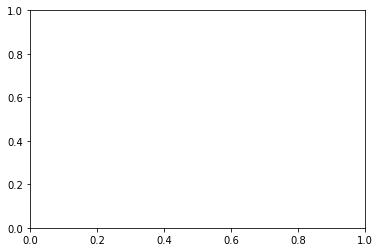

In [111]:
#Visualise Home vs Away
plt.scatter(X, Y, color='blue') 
plt.title('Home Scores vs Away Scores')
plt.xlabel('Homescores')
plt.ylabel('Away scores')
plt.show()

In [97]:
# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(x,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(x,y)

# Visualize the Linear Regression results
plt.scatter(x, y, color='blue') 
plt.plot(X, reg_line.predict(x), color='red')
plt.title('Home score vs Away (Linear Regression)')
plt.xlabel('Home Score')
plt.ylabel('Away score')
plt.show()


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(x)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(x, y, color='blue') 
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home vs Away (Polynomial Regression)')
plt.xlabel('Home')
plt.ylabel('Away')
plt.show()

IndexError: ignored

In [0]:
# Fit polynomial Regression to the dataset
poly_reg_4 = PolynomialFeatures(degree = 4) 
X_poly = poly_reg_4.fit_transform(x)


pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') # You can put any color you like. This just helps us highlight the data points
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home vs Away (Polynomial Regression)')
plt.xlabel('Home')
plt.ylabel('Away')
plt.show()

In [0]:
# Predict using linear regression
lin_pred = reg_line.predict([[15]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg_4.fit_transform([[15]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg_4.fit_transform(X))

#Logistics Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [100]:
#Split Dataset
train = fifaresults[:28587] 

# Drop all the indexes of the train data we created above from the main data set then store the remaining data in a variable called test
test = fifaresults.drop(train.index)

# Confirm that the train and test dataset have out desired length
print("train:" + str(len(train)))
print("test:"+ str(len(test)))

train:28587
test:29206


In [101]:
#Train dataset
train_count=train['home_score'].value_counts()

# lets test home
test_count=test['home_score'].value_counts()

# Print out  train and test dataset
print(train_count)
print('*************************')
print(test_count)

1.0     8372
0.0     6554
2.0     6316
3.0     3490
4.0     1804
5.0      914
6.0      493
7.0      271
8.0      149
9.0       96
10.0      41
11.0      28
12.0      21
13.0      11
14.0       8
15.0       4
16.0       4
19.0       3
17.0       2
24.0       1
30.0       1
22.0       1
20.0       1
18.0       1
31.0       1
Name: home_score, dtype: int64
*************************
1.0     3701
0.0     3246
2.0     2723
3.0     1313
4.0      673
5.0      268
6.0      151
7.0       75
8.0       43
9.0       20
10.0      18
11.0       5
12.0       5
15.0       3
13.0       2
16.0       2
14.0       2
21.0       1
17.0       1
Name: home_score, dtype: int64


In [102]:
#Train Home Away Data

train_count=train['away_score'].value_counts()

# lets test home
test_count=test['away_score'].value_counts()

# Print out  train and test dataset
print(train_count)
print('*************************')
print(test_count)

0.0     10281
1.0      9243
2.0      5063
3.0      2224
4.0       933
5.0       420
6.0       204
7.0        96
8.0        48
9.0        25
10.0       16
12.0        6
13.0        6
11.0        5
15.0        5
18.0        4
16.0        2
20.0        2
17.0        1
19.0        1
14.0        1
21.0        1
Name: away_score, dtype: int64
*************************
0.0     4853
1.0     3953
2.0     2029
3.0      829
4.0      331
5.0      110
6.0       65
7.0       37
8.0       18
9.0       11
10.0       4
17.0       2
12.0       2
15.0       1
16.0       1
11.0       1
19.0       1
18.0       1
20.0       1
14.0       1
13.0       1
Name: away_score, dtype: int64


In [112]:
#defining X and Y
X = fifaresults.iloc[:, [0,3,4,7]]
Y = fifaresults['away_score'].values

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression()

y_pred = LogReg.predict(X_test)
y_pred

ValueError: ignored

#Conclusion and Recommendation